In [88]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns

Questão 1

In [50]:
data_customer= pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_customers_dataset.csv")
data_loc=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_geolocation_dataset.csv")
data_order_item=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_order_items_dataset.csv")
data_payment=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_order_payments_dataset.csv")
data_review=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_order_reviews_dataset.csv")
data_order=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_orders_dataset.csv")
data_product=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_products_dataset.csv")
data_seller=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/olist_sellers_dataset.csv")
data_product_trans=pd.read_csv("C:/Users/nando/Aprendendo-python-pra-ciencia-de-dados/Aprendendo-python-pra-ciencia-de-dados/product_category_name_translation.csv")

Existem algumas chaves que correlacionam os bancos de dados, como "order_id", "Seller_id" e etc. Com isso se torna possível criar um banco relacionado com a maioria dos dados. Sabendo disso eu fui gradativamente cruzando os bancos para não haver duplicadas.

In [80]:
# Cruzamento gradativo
customers_location = pd.merge(data_customer,data_loc, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')
cusloc_order = customers_location.merge(data_order, how='inner', on='customer_id')
cuslocord_item = cusloc_order.merge(data_order_item, how='inner', on='order_id')
cuslocordite_prod = cuslocord_item.merge(data_product, how='inner', on='product_id')
cuslocordite_rev= cuslocordite_prod.merge(data_review, how='left', on='order_id')




In [82]:
name_drop=["product_name_lenght"	,"product_description_lenght"	,"product_photos_qty"	
        ,"product_weight_g"	,"product_length_cm"	,"product_height_cm",	"product_width_cm","order_status",
        "order_delivered_carrier_date"	,"order_delivered_customer_date",	"order_estimated_delivery_date","review_comment_title","review_comment_message"]

data_final=cuslocordite_rev.drop(name_drop,axis=1)

In [117]:
pd.set_option('display.max_columns', None)
data_final.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp,Dia da Semana,Hora,Região
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26 00:00:00,2017-05-30 22:34:40,Tuesday,15,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.726853,-46.545746,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:58:32,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30 00:00:00,2018-02-10 22:43:29,Friday,20,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15 00:00:00,2018-06-15 12:10:59,Saturday,16,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 17:29:19,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29 00:00:00,2018-04-02 18:36:47,Tuesday,16,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.987222,-47.151073,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 10:10:09,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10 00:00:00,2018-08-17 01:59:52,Sunday,9,Sudeste


QUESTÃO 2

In [93]:
# Converter a coluna de data para o tipo datetime
data_final['order_purchase_timestamp'] = pd.to_datetime(data_final['order_purchase_timestamp'])

# Agrupar por data de compra para obter o volume de vendas
volume_vendas = data_final.groupby(data_final['order_purchase_timestamp'].dt.date).agg({
    'order_id': 'nunique',  # Contar o número único de pedidos
    'price': 'sum'          # Somar o preço dos produtos vendidos
}).reset_index()

volume_vendas.columns = ['Data de Compra', 'Quantidade de Pedidos', 'Total de Vendas']

# Visualizar os dados
print(volume_vendas.head(100))

   Data de Compra  Quantidade de Pedidos  Total de Vendas
0      2016-09-04                      1            72.89
1      2016-09-05                      1            59.50
2      2016-09-15                      1           134.97
3      2016-10-02                      1           100.00
4      2016-10-03                      8           463.48
..            ...                    ...              ...
95     2017-03-28                    102         12373.11
96     2017-03-29                     74          8660.54
97     2017-03-30                     74         10025.60
98     2017-03-31                     70         12199.56
99     2017-04-01                     67         17697.37

[100 rows x 3 columns]


In [100]:
# Adiciona a coluna de Ticket Médio
volume_vendas['Ticket Médio'] = volume_vendas['Total de Vendas'] / volume_vendas['Quantidade de Pedidos']




   Data de Compra  Quantidade de Pedidos  Total de Vendas  Ticket Médio
0      2016-09-04                      1            72.89     72.890000
1      2016-09-05                      1            59.50     59.500000
2      2016-09-15                      1           134.97    134.970000
3      2016-10-02                      1           100.00    100.000000
4      2016-10-03                      8           463.48     57.935000
..            ...                    ...              ...           ...
95     2017-03-28                    102         12373.11    121.305000
96     2017-03-29                     74          8660.54    117.034324
97     2017-03-30                     74         10025.60    135.481081
98     2017-03-31                     70         12199.56    174.279429
99     2017-04-01                     67         17697.37    264.139851

[100 rows x 4 columns]


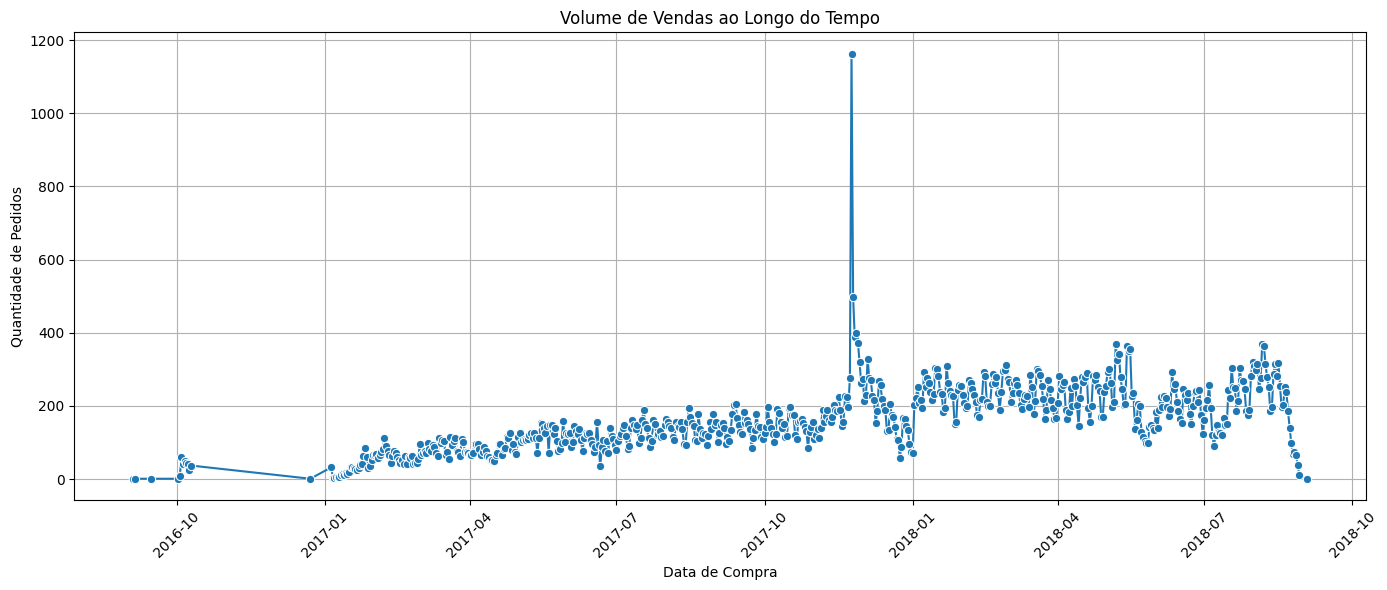

In [95]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Data de Compra', y='Quantidade de Pedidos', data=volume_vendas, marker='o')
plt.title('Volume de Vendas ao Longo do Tempo')
plt.xlabel('Data de Compra')
plt.ylabel('Quantidade de Pedidos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos ver que o volume total de vendar permance constante durante o tempo, com alguns outliers.

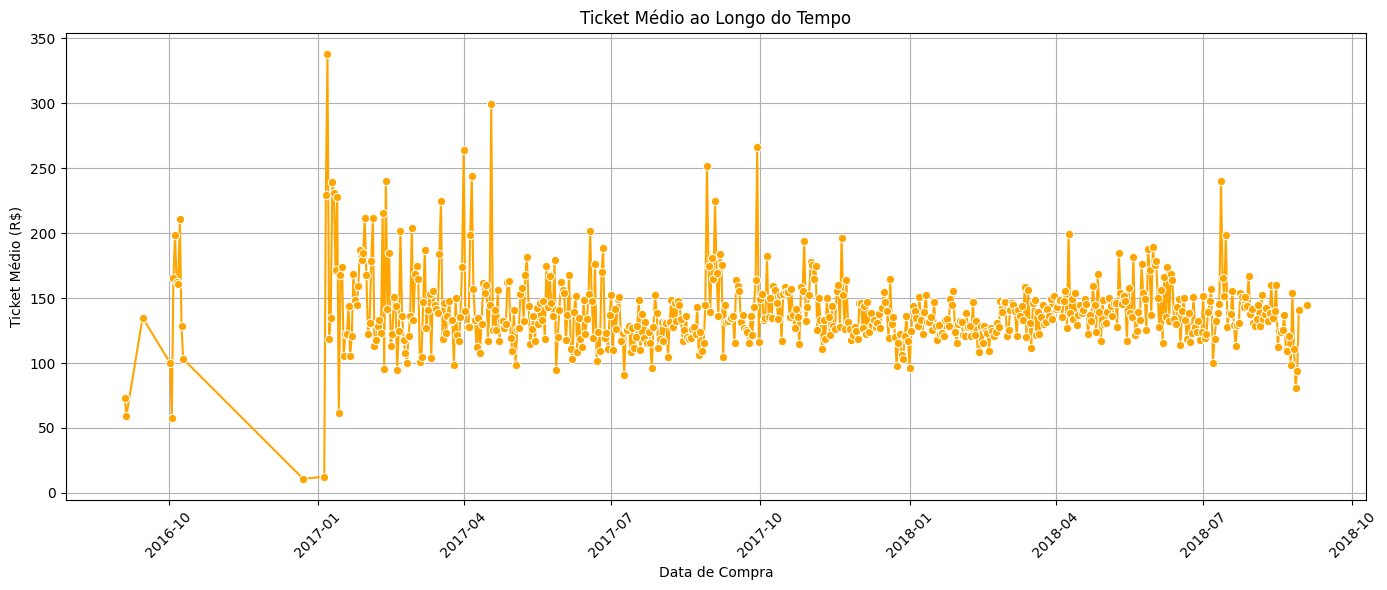

In [103]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Data de Compra', y='Ticket Médio', data=volume_vendas, marker='o', color='orange')
plt.title('Ticket Médio ao Longo do Tempo')
plt.xlabel('Data de Compra')
plt.ylabel('Ticket Médio (R$)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O ticket médio também permance constante durante o tempo.

Questão 4

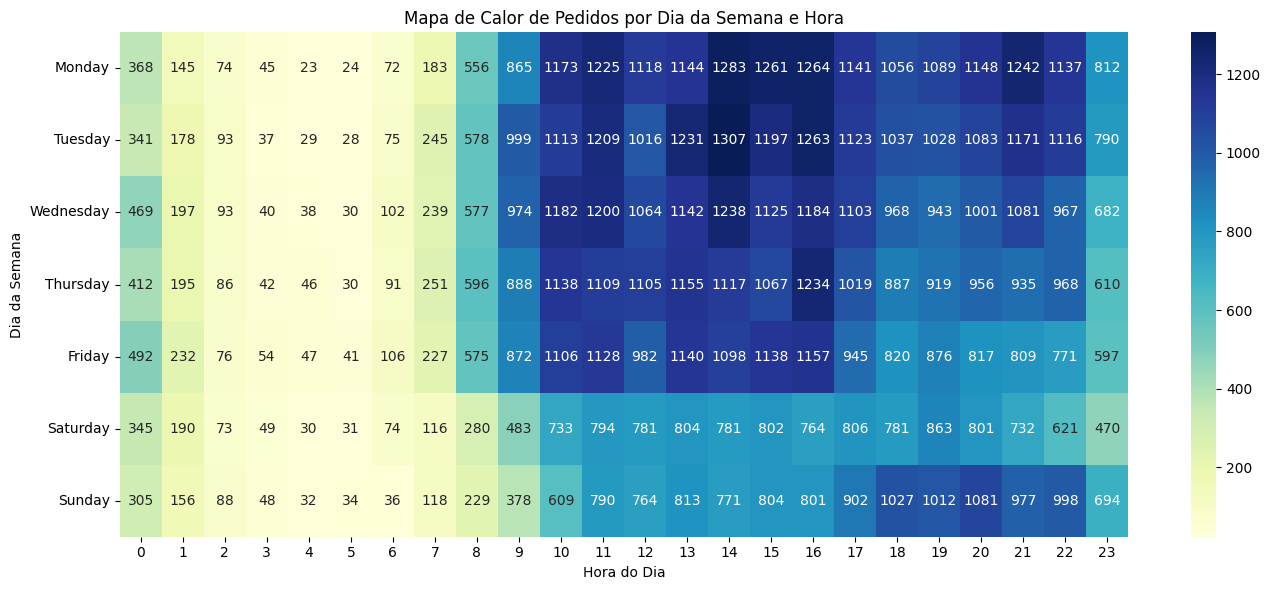

In [98]:
# Extrair o dia da semana e a hora
data_final['Dia da Semana'] = data_final['order_purchase_timestamp'].dt.day_name()  # Nome do dia da semana
data_final['Hora'] = data_final['order_purchase_timestamp'].dt.hour  # Extrai a hora

# Criar uma tabela de frequência para pedidos por dia da semana e hora
tabela_frequencia = data_final.groupby(['Dia da Semana', 'Hora']).size().unstack(fill_value=0)

# Ordenar a tabela de frequência para que os dias da semana sigam uma ordem lógica
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tabela_frequencia = tabela_frequencia.reindex(dias_ordenados)

# Plotar o Mapa de Calor
plt.figure(figsize=(14, 6))
sns.heatmap(tabela_frequencia, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Mapa de Calor de Pedidos por Dia da Semana e Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.tight_layout()
plt.show()

Pelo mapa de calor podemos ver qu as pessoas tendem a realizar mais comprar durante o período da tarde e no início da semana.

Questão 3

In [104]:
# Converter a coluna de data para o tipo datetime, caso ainda não tenha sido feito
data_final['order_purchase_timestamp'] = pd.to_datetime(data_final['order_purchase_timestamp'])

# Calcular o volume de vendas, ticket médio e valor médio do frete por estado
analise_estado = data_final.groupby('customer_state').agg({
    'order_id': 'nunique',          # Volume de vendas (número de pedidos)
    'price': 'sum',                 # Total de vendas
    'freight_value': 'mean'         # Valor médio do frete
}).reset_index()

# Calcular o ticket médio
analise_estado['Ticket Médio'] = analise_estado['price'] / analise_estado['order_id']

# Adicionar a coluna de região com base no estado
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def definir_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return 'Outros'

analise_estado['Região'] = analise_estado['customer_state'].apply(definir_regiao)


  customer_state  order_id      price  freight_value  Ticket Médio    Região
0             AC        81   15982.95      40.073370    197.320370     Norte
1             AL       410   80388.78      35.708479    196.070195  Nordeste
2             AM       147   22412.74      33.169458    152.467619     Norte
3             AP        68   13474.30      34.006098    198.151471     Norte
4             BA      3350  512181.22      26.322913    152.889916  Nordeste


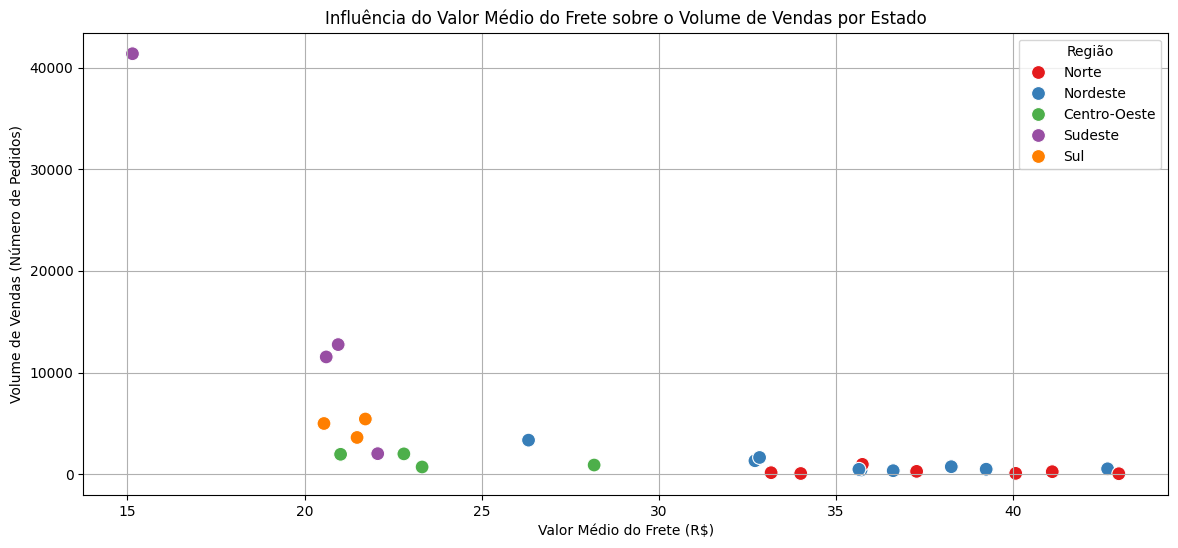

In [105]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='freight_value', y='order_id', hue='Região', data=analise_estado, palette='Set1', s=100)
plt.title('Influência do Valor Médio do Frete sobre o Volume de Vendas por Estado')
plt.xlabel('Valor Médio do Frete (R$)')
plt.ylabel('Volume de Vendas (Número de Pedidos)')
plt.grid(True)
plt.show()

Existe uma relação inversa entre o valor do frete e número de vendas, vemos que quanto menor o valor do frete maior será o volume de vendas totais.

C:\Users\nando\AppData\Local\Temp\ipykernel_5328\3946425036.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Região', y='order_id', data=analise_estado, estimator=sum, ci=None, palette='viridis')
C:\Users\nando\AppData\Local\Temp\ipykernel_5328\3946425036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Região', y='order_id', data=analise_estado, estimator=sum, ci=None, palette='viridis')


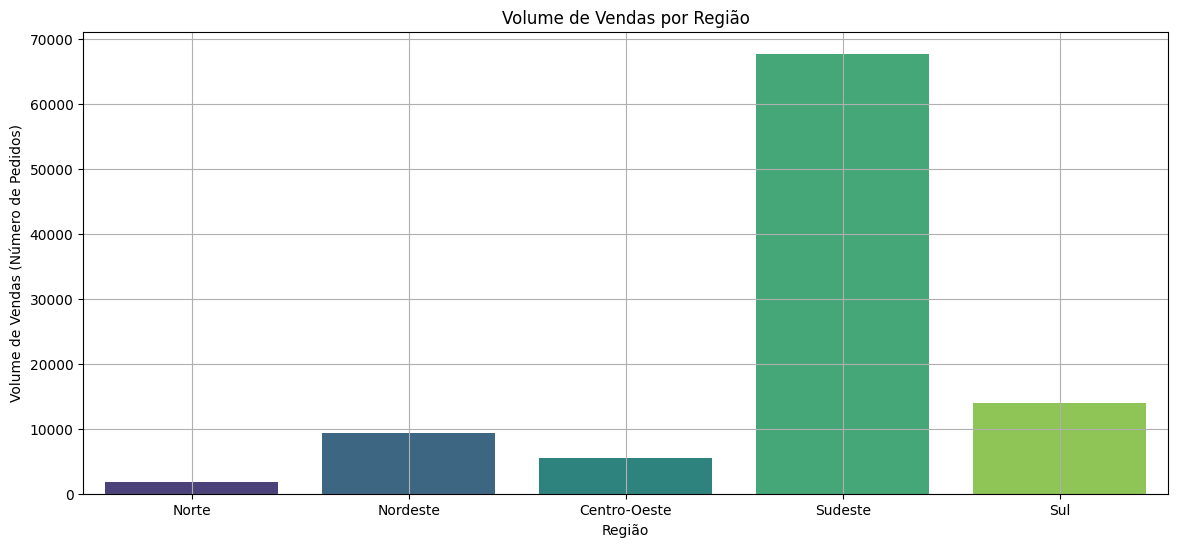

In [107]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Região', y='order_id', data=analise_estado, estimator=sum, ci=None, palette='viridis')
plt.title('Volume de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Volume de Vendas (Número de Pedidos)')
plt.grid(True)
plt.show()

Observamos que os estados mais distantes apresentam um menor volume total de compras, principalmente devido ao alto custo do frete, que se torna um obstáculo significativo para grande parte da população. Para mitigar esse problema, uma estratégia eficaz seria negociar melhores condições com as transportadoras, utilizando o argumento de que, ao reduzir o custo do frete, o volume de vendas aumentaria, beneficiando tanto a empresa varejista quanto as transportadoras pelo aumento no número de entregas e, consequentemente, nos lucros.

Questão 5.

In [152]:
data_payment1=data_final.merge(data_payment, how='left', on='order_id')
data_payment1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp,Dia da Semana,Hora,Região,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26 00:00:00,2017-05-30 22:34:40,Tuesday,15,Sudeste,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.726853,-46.545746,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:58:32,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30 00:00:00,2018-02-10 22:43:29,Friday,20,Sudeste,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15 00:00:00,2018-06-15 12:10:59,Saturday,16,Sudeste,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 17:29:19,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29 00:00:00,2018-04-02 18:36:47,Tuesday,16,Sudeste,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.987222,-47.151073,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 10:10:09,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10 00:00:00,2018-08-17 01:59:52,Sunday,9,Sudeste,1.0,credit_card,8.0,252.25


In [155]:
# Calcular o ticket médio por transação
data_payment1['ticket_medio'] = data_payment1['price'] + data_payment1['freight_value']
ticket_medio_pagamento = data_payment1.groupby('payment_type').agg({
    'ticket_medio': 'mean'
}).reset_index()
data_final_1 = pd.get_dummies(data_payment1['payment_type'], prefix='payment_type')
data_final_1['ticket_medio'] = data_payment1['ticket_medio']
correlacao = data_final_1.corr()['ticket_medio'].drop('ticket_medio')
print(correlacao)

payment_type_boleto        -0.042450
payment_type_credit_card    0.050450
payment_type_debit_card    -0.008500
payment_type_voucher       -0.019409
Name: ticket_medio, dtype: float64


A correlação entre o ticket médio e as formas de pagamento boleto,débito e voucher são negativas enquanto que a correlação entre o ticket médio e a forma de pagamento no crédito é positiva.

QUESTÃO 6

In [118]:
# Calcular os produtos mais vendidos no geral
produtos_geral = data_final.groupby('product_category_name').agg({
    'order_item_id': 'count',  
    'price': 'sum'             
}).reset_index().sort_values(by='order_item_id', ascending=False)

# Calcular os produtos mais vendidos por estado
produtos_estado = data_final.groupby(['customer_state', 'product_id']).agg({
    'order_item_id': 'count',  
    'price': 'sum'             
}).reset_index().sort_values(by=['customer_state', 'order_item_id'], ascending=[True, False])

# Adicionar a coluna de região com base no estado
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def definir_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return 'Outros'

data_final['Região'] = data_final['customer_state'].apply(definir_regiao)

# Calcular os produtos mais vendidos por região
produtos_regiao = data_final.groupby(['Região', 'product_id']).agg({
    'order_item_id': 'count', 
    'price': 'sum'             
}).reset_index().sort_values(by=['Região', 'order_item_id'], ascending=[True, False])


C:\Users\nando\AppData\Local\Temp\ipykernel_5328\1827421233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_item_id', y='product_category_name', data=top_produtos_geral, palette='viridis')


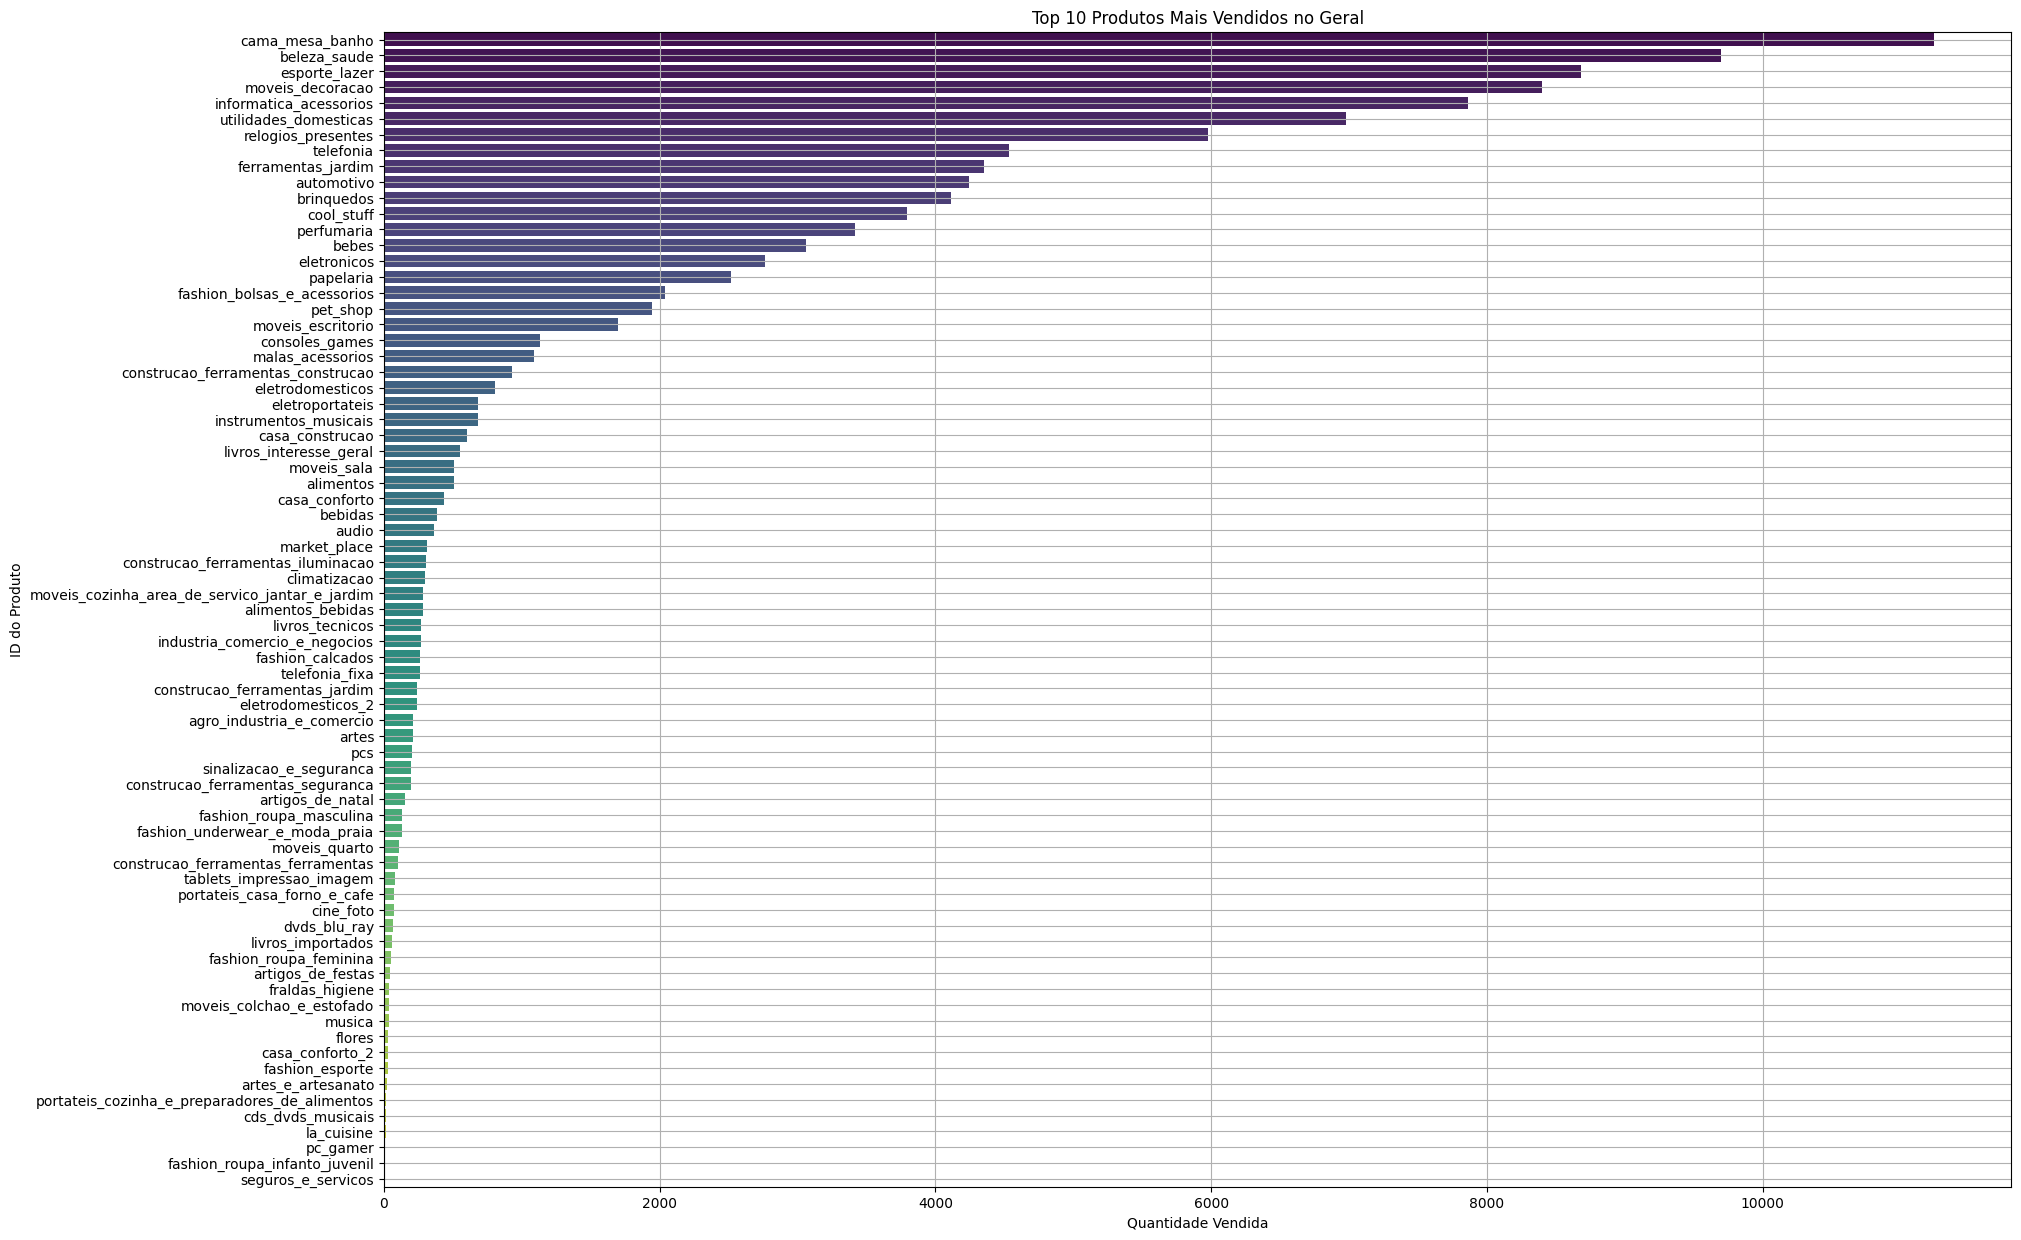

In [137]:
plt.figure(figsize=(21, 15))
top_produtos_geral = produtos_geral.head(100) 
sns.barplot(x='order_item_id', y='product_category_name', data=top_produtos_geral, palette='viridis')
plt.title('Top 10 Produtos Mais Vendidos no Geral')
plt.xlabel('Quantidade Vendida')
plt.ylabel('ID do Produto')
plt.grid(True)
plt.show()


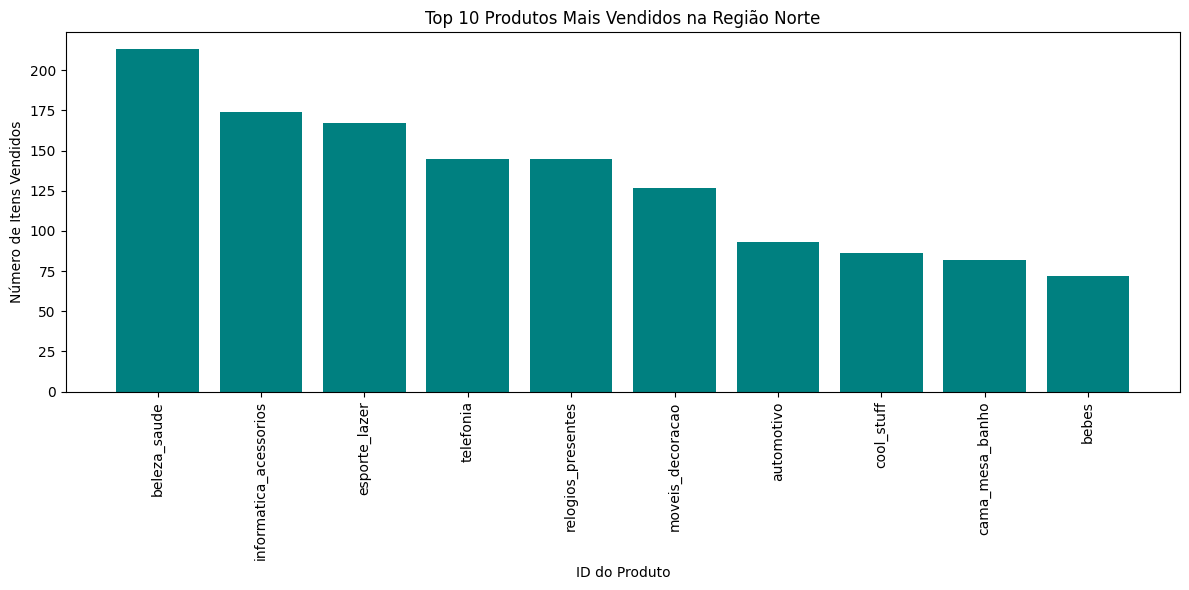

In [150]:
# Filtrar dados para a Região Norte
dados_norte = data_final[data_final['Região'] == 'Norte']

# Produtos mais vendidos na Região Norte
produtos_norte = dados_norte.groupby('product_category_name').agg({
    'order_item_id': 'count',
    'price': 'sum'
}).reset_index().sort_values(by='order_item_id', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(produtos_norte['product_category_name'].astype(str), produtos_norte['order_item_id'], color='teal')
plt.xlabel('ID do Produto')
plt.ylabel('Número de Itens Vendidos')
plt.title('Top 10 Produtos Mais Vendidos na Região Norte')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('produtos_norte_top10.png')
plt.show()



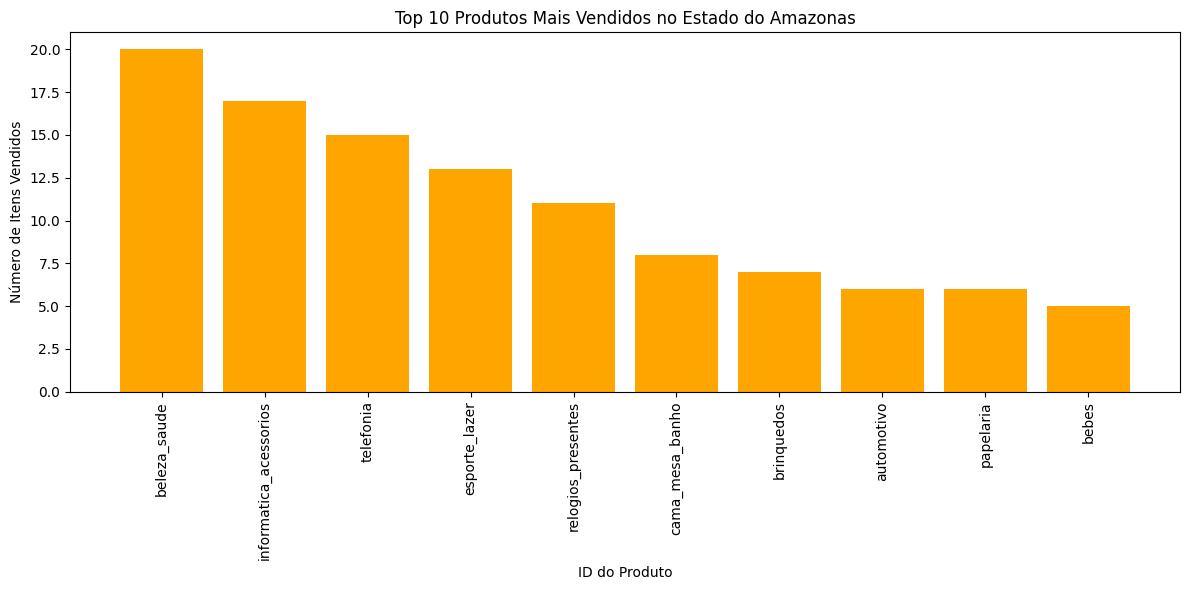

In [151]:
# Filtrar dados para o estado do Amazonas
dados_amazonas = data_final[data_final['customer_state'] == 'AM']

# Produtos mais vendidos no estado do Amazonas
produtos_amazonas = dados_amazonas.groupby('product_category_name').agg({
    'order_item_id': 'count',
    'price': 'sum'
}).reset_index().sort_values(by='order_item_id', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(produtos_amazonas['product_category_name'].astype(str), produtos_amazonas['order_item_id'], color='orange')
plt.xlabel('ID do Produto')
plt.ylabel('Número de Itens Vendidos')
plt.title('Top 10 Produtos Mais Vendidos no Estado do Amazonas')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig('produtos_amazonas_top10.png')
plt.show()
